<a href="https://colab.research.google.com/github/ninablue0/Phishing-Detection-Using-Deep-Learning/blob/main/mpfcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = '/content/PhiUSIIL_Phishing_URL_Dataset.csv'
data = pd.read_csv(file_path)

# Drop unnecessary columns
columns_to_drop = ['FILENAME', 'URL', 'Domain',  'Title', 'URLLength', 'DomainTitleMatchScore', 'URLSimilarityIndex']
data = data.drop(columns=columns_to_drop, axis=1)

# Split dataset
X = data.drop('label', axis=1)
y = data['label']


In [1]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.0 MB/s eta 0:00:00


In [5]:
from category_encoders import TargetEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

# Target Encoding on the 'TLD' column
categorical_cols = ['TLD']
target_encoder = TargetEncoder(cols=categorical_cols)
X_encoded = target_encoder.fit_transform(X, y)

# MinMaxScaler for numerical features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_encoded)

# SMOTE for handling class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras import Input

# Build the FCNN model
model_fcnn = Sequential()


model_fcnn.add(Input(shape=(X_train.shape[1],)))

model_fcnn.add(Dense(128, activation='relu', kernel_regularizer=l2(0.002)))
model_fcnn.add(Dropout(0.7))

# Hidden layer
model_fcnn.add(Dense(64, activation='relu', kernel_regularizer=l2(0.004)))
model_fcnn.add(Dropout(0.7))

# hidden layer
model_fcnn.add(Dense(32, activation='relu', kernel_regularizer=l2(0.004)))
model_fcnn.add(Dropout(0.7))

# Output Layer binary classification
model_fcnn.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model_fcnn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping_fcnn = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Train the model
history_fcnn = model_fcnn.fit(X_train, y_train,
                              validation_data=(X_val, y_val),
                              epochs=20,
                              batch_size=32,
                              callbacks=[early_stopping_fcnn])


Epoch 1/20
6743/6743 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.7330 - loss: 0.9092 - val_accuracy: 0.9864 - val_loss: 0.1788
Epoch 2/20
6743/6743 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9810 - loss: 0.1932 - val_accuracy: 0.9924 - val_loss: 0.0922
Epoch 3/20
6743/6743 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.9876 - loss: 0.1168 - val_accuracy: 0.9940 - val_loss: 0.0716
Epoch 4/20
6743/6743 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.9899 - loss: 0.0942 - val_accuracy: 0.9953 - val_loss: 0.0622
Epoch 5/20
6743/6743 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - accuracy: 0.9909 - loss: 0.0841 - val_accuracy: 0.9960 - val_loss: 0.0562
Epoch 6/20
6743/6743 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9915 - loss: 0.0783 - val_accuracy: 0.9962 - val_loss: 0.0534
Epoch 7/20
6743/6743 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.9919 - loss: 0.0744 - val_accuracy: 0.9965 - val_loss: 0.0497
Epoch 8/20
6743/6743 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.9928 - loss: 0

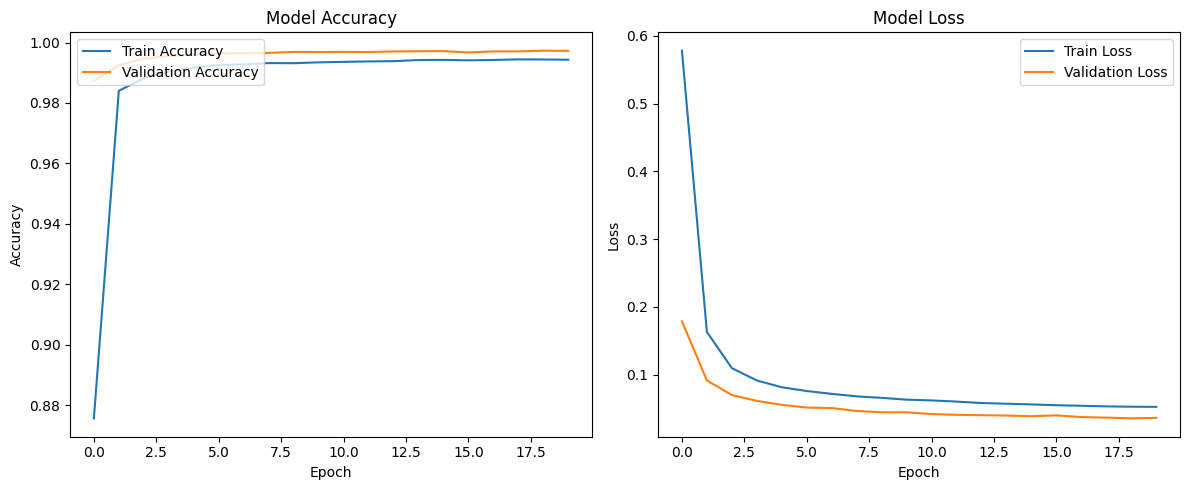

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_fcnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_fcnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_fcnn.history['loss'], label='Train Loss')
plt.plot(history_fcnn.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [7]:
# Save the trained model
model_fcnn.save("phishing_detection_model.h5")


Validation

In [8]:
# Load the dataset
file_path = '/content/validation_dataset_with_phishing.csv'
data = pd.read_csv(file_path)

# Dropping the same columns
columns_to_drop = ['FILENAME', 'URL', 'Domain',  'Title', 'URLLength', 'DomainTitleMatchScore', 'URLSimilarityIndex']
data = data.drop(columns=columns_to_drop, axis=1)

# Split dataset
X = data.drop('label', axis=1)
y = data['label']

In [9]:
from category_encoders import TargetEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

# Target Encoding on the 'TLD' column
categorical_cols = ['TLD']
target_encoder = TargetEncoder(cols=categorical_cols)
X_encoded = target_encoder.fit_transform(X, y)

# MinMaxScaler for numerical features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_encoded)

# SMOTE for handling class imbalance
#smote = SMOTE(random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# No need for smote since there is no class imbalance on validation dataset



In [10]:
from tensorflow.keras.models import load_model

# Load the trained model
model_fcnn = load_model("phishing_detection_model.h5")


In [11]:
# Predict using the trained model on validation dataset
y_pred = model_fcnn.predict(X_encoded)

# Convert probabilities to binary labels (0 or 1) based on a threshold of 0.5
y_pred_labels = (y_pred > 0.5).astype(int)

# Print predicted labels
print(y_pred_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
[[1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]]


In [12]:
from sklearn.metrics import accuracy_score, classification_report

# Accuracy
accuracy = accuracy_score(y, y_pred_labels)
report = classification_report(y, y_pred_labels)

print(f"Accuracy: {accuracy}")
print(report)


Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.92      1.00      0.96        11

    accuracy                           0.95        19
   macro avg       0.96      0.94      0.94        19
weighted avg       0.95      0.95      0.95        19

